In [18]:
import pandas as pd
dataset = pd.read_csv('linear_reg.csv')

In [19]:
dataset

,x0,x1,x2,y
0,0.066034,0.879702,0.829733,41.769808
1,0.513228,0.356076,0.790343,35.393249
2,0.598108,0.919958,0.524912,38.840649
3,0.476180,0.397580,0.852777,38.574305
4,0.763875,0.100939,0.619018,28.202262
...,...,...,...,...
995,0.883523,0.140052,0.268641,22.108306
996,0.568823,0.521391,0.708904,35.547254
997,0.365352,0.806447,0.075812,27.152123
998,0.269633,0.830235,0.893871,43.013813


In [20]:
import numpy as np

y = np.array(dataset['y'])
X = np.array(dataset.drop('y', axis=1))

In [21]:
X.shape

(1000, 3)

In [22]:
import gamma.modules as gm

model = gm.shape_transform_1d(X.shape[1], 1)

In [23]:
import gamma.trainer as gt
import torch

optm = torch.optim.Adam(model.parameters(), lr=0.01)
trainer = gt.Trainer(model, optm, torch.nn.MSELoss())

In [24]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

history =trainer.train((X, y), split_val=True, epochs=100, batch_size=32)

Epoch 1/100 - train_loss: 1010.9739 - val_loss: 1002.5916
Epoch 2/100 - train_loss: 971.5516 - val_loss: 963.1420
Epoch 3/100 - train_loss: 933.2052 - val_loss: 924.8233
Epoch 4/100 - train_loss: 895.9825 - val_loss: 887.6524
Epoch 5/100 - train_loss: 859.8849 - val_loss: 851.6183
Epoch 6/100 - train_loss: 824.8975 - val_loss: 816.7026
Epoch 7/100 - train_loss: 791.0014 - val_loss: 782.8852
Epoch 8/100 - train_loss: 758.1762 - val_loss: 750.1449
Epoch 9/100 - train_loss: 726.4012 - val_loss: 718.4601
Epoch 10/100 - train_loss: 695.6548 - val_loss: 687.8093
Epoch 11/100 - train_loss: 665.9161 - val_loss: 658.1709
Epoch 12/100 - train_loss: 637.1638 - val_loss: 629.5235
Epoch 13/100 - train_loss: 609.3768 - val_loss: 601.8455
Epoch 14/100 - train_loss: 582.5342 - val_loss: 575.1159
Epoch 15/100 - train_loss: 556.6151 - val_loss: 549.3134
Epoch 16/100 - train_loss: 531.5988 - val_loss: 524.4171
Epoch 17/100 - train_loss: 507.4648 - val_loss: 500.4062
Epoch 18/100 - train_loss: 484.1928 - 

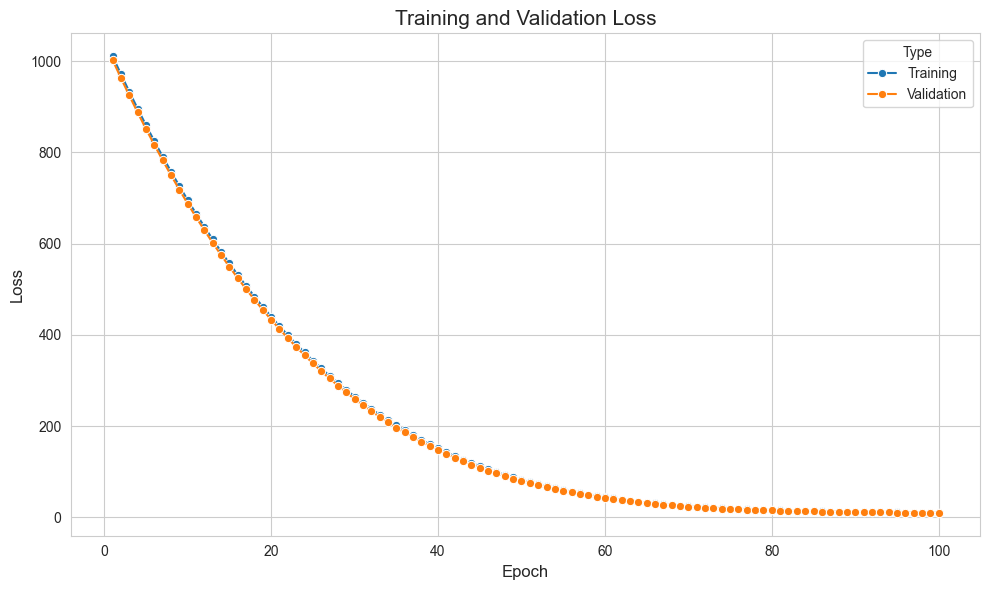

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [25]:
from gamma import plot

plot.plot_training_loss(history)